# Vibe Coding: Real-World Data Cleaning Challenge

## The Mission

You're a Data Analyst at **TechSalary Insights**. Your manager needs answers to critical business questions, but the data is messy. Your job is to clean it and provide accurate insights.

**The catch:** You must figure out how to clean the data yourself. No step by step hints just you, your AI assistant, and real world messy data.

---

## The Dataset: Ask A Manager Salary Survey 2021

**Location:** `../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv`

This is **real survey data** from Ask A Manager's 2021 salary survey with over 28,000 responses from working professionals. The data comes from this survey: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

**Why this dataset is perfect for vibe coding:**
- Real human responses (inconsistent formatting)
- Multiple currencies and formats  
- Messy job titles and location data
- Missing and invalid entries
- Requires business judgment calls

---

## Your Business Questions

Answer these **exact questions** with clean data. There's only one correct answer for each:

### Core Questions (Required):
1. **What is the median salary for Software Engineers in the United States?** 
2. **Which US state has the highest average salary for tech workers?**
3. **How much does salary increase on average for each year of experience in tech?**
4. **Which industry (besides tech) has the highest median salary?**

### Bonus Questions (If time permits):
5. **What's the salary gap between men and women in tech roles?**
6. **Do people with Master's degrees earn significantly more than those with Bachelor's degrees?**

**Success Criteria:** Your final answers will be compared against the "official" results. Data cleaning approaches can vary, but final numbers should be within 5% of expected values.


---
# Your Work Starts Here

## Step 0: Create Your Plan
**Before writing any code, use Cursor to create your todo plan. Then paste it here:**

## My Data Cleaning Plan

*(Paste your Cursor todo list here)*

- [ ] Load the dataset and inspect columns
- [ ] Identify and handle missing or invalid values
- [ ] Standardize salary formats and currencies
- [ ] Normalize job titles (focus on tech roles)
- [ ] Clean and standardize location (country, state)
- [ ] Standardize experience and education fields
- [ ] Identify and handle outliers in salary and experience
- [ ] Prepare clean data for analysis


## Step 1: Data Loading and Exploration

Start here! Load the dataset and get familiar with what you're working with.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset and inspect columns

# Load the dataset (tab-separated values)
df = pd.read_csv("../../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv", sep="\t")

# Show the shape and first 5 rows
print("Shape:", df.shape)
display(df.head())

# Show all column names and data types
print("\nColumns:")
print(df.dtypes)

Shape: (28062, 18)


,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White



Columns:
Timestamp                                                                                                                                                                                                                                object
How old are you?                                                                                                                                                                                                                         object
What industry do you work in?                                                                                                                                                                                                            object
Job title                                                                                                                                                                                                                                object
If your job title needs additi

## Step 2: Data Cleaning


In [3]:
# Step 2.1: Data Cleaning - Rename columns to shorter, more convenient names
df.columns = [
    'timestamp',
    'age',
    'industry',
    'job_title',
    'job_context',
    'salary',
    'additional_comp',
    'currency',
    'currency_other',
    'income_context',
    'country',
    'state',
    'city',
    'exp_overall',
    'exp_field',
    'education',
    'gender',
    'race'
 ]
print("\nShortened column names:")
print(df.columns.tolist())


Shortened column names:
['timestamp', 'age', 'industry', 'job_title', 'job_context', 'salary', 'additional_comp', 'currency', 'currency_other', 'income_context', 'country', 'state', 'city', 'exp_overall', 'exp_field', 'education', 'gender', 'race']


In [4]:
# Step 2.2: Identify and handle missing or invalid values
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_summary)

# Show percentage of missing values for each column
percent_missing = df.isnull().mean().sort_values(ascending=False) * 100
print("\nPercentage missing per column:")
print(percent_missing)

# Show a sample of rows with missing values
print("\nSample rows with missing values:")
display(df[df.isnull().any(axis=1)].head())

Missing values per column:
currency_other     27856
income_context     25020
job_context        20800
additional_comp     7296
state               5023
education            222
race                 177
gender               171
city                  82
industry              74
job_title              1
timestamp              0
age                    0
salary                 0
currency               0
country                0
exp_overall            0
exp_field              0
dtype: int64

Percentage missing per column:
currency_other     99.265911
income_context     89.159718
job_context        74.121588
additional_comp    25.999572
state              17.899651
education           0.791105
race                0.630746
gender              0.609365
city                0.292210
industry            0.263702
job_title           0.003564
timestamp           0.000000
age                 0.000000
salary              0.000000
currency            0.000000
country             0.000000
exp_overall   

,timestamp,age,industry,job_title,job_context,salary,additional_comp,currency,currency_other,income_context,country,state,city,exp_overall,exp_field,education,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [5]:
# Step 2.3: Handle missing values on a copy of the original DataFrame
df_clean = df.copy()

# Drop columns with >70% missing values (not useful for analysis)
cols_to_drop = [col for col in df_clean.columns if df_clean[col].isnull().mean() > 0.7]
df_clean = df_clean.drop(columns=cols_to_drop)
print("Dropped columns:", cols_to_drop)

# For other columns, only fill missing values if the column still exists
fill_unknown = ['state', 'city', 'job_context', 'income_context']
for col in fill_unknown:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna('Unknown')
if 'additional_comp' in df_clean.columns:
    df_clean['additional_comp'] = df_clean['additional_comp'].fillna(0)

# For 'education', 'gender', 'race', 'industry', 'job_title', fill with 'Unknown' if present
for col in ['education', 'gender', 'race', 'industry', 'job_title']:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna('Unknown')

# Check remaining missing values
print("\nRemaining missing values:")
print(df_clean.isnull().sum())

Dropped columns: ['job_context', 'currency_other', 'income_context']

Remaining missing values:
timestamp          0
age                0
industry           0
job_title          0
salary             0
additional_comp    0
currency           0
country            0
state              0
city               0
exp_overall        0
exp_field          0
education          0
gender             0
race               0
dtype: int64


In [6]:
# Step 2.4: Standardize salary formats and currencies
import re

# Remove any non-numeric characters from salary and convert to float
def clean_salary(val):
    if pd.isnull(val):
        return None
    # Remove currency symbols, commas, spaces, etc.
    val = re.sub(r'[^0-9.]', '', str(val))
    try:
        return float(val)
    except ValueError:
        return None

df_clean['salary'] = df_clean['salary'].apply(clean_salary)

# Check for unique currencies
print("Unique currencies:", df_clean['currency'].unique())

# For simplicity, keep only rows where currency is USD (or US Dollar)
usd_labels = ['USD', 'US Dollars', 'US Dollar', 'usd', 'US dollars', 'US dollar', 'U.S. dollars', 'U.S. Dollars']
df_clean = df_clean[df_clean['currency'].isin(usd_labels)]

# Show summary statistics for cleaned salary
print(df_clean['salary'].describe())

Unique currencies: ['USD' 'GBP' 'CAD' 'EUR' 'AUD/NZD' 'Other' 'CHF' 'ZAR' 'SEK' 'HKD' 'JPY']
count    2.337400e+04
mean     9.704064e+04
std      6.745838e+05
min      0.000000e+00
25%      5.600000e+04
50%      7.800000e+04
75%      1.120000e+05
max      1.020000e+08
Name: salary, dtype: float64


In [7]:
# Step 2.5: Normalize job titles (focus on tech roles)

import re

# Define a function to map messy job titles to standard tech categories
TECH_TITLES = {
    'Software Engineer': [r'software engineer', r'swe', r'software developer', r'software dev', r'software eng', r'sr software', r'lead software', r'principal software'],
    'Data Scientist': [r'data scientist', r'data science', r'data analyst', r'data engineer', r'machine learning', r'ml engineer'],
    'Product Manager': [r'product manager', r'product owner', r'product lead'],
    'DevOps Engineer': [r'devops', r'site reliability', r'sre', r'infrastructure'],
    'QA Engineer': [r'qa', r'quality assurance', r'test engineer', r'sdet'],
    'Frontend Engineer': [r'frontend', r'front end', r'ui engineer'],
    'Backend Engineer': [r'backend', r'back end', r'api engineer'],
    'Full Stack Engineer': [r'full stack', r'fullstack'],
    'Security Engineer': [r'security engineer', r'appsec', r'cybersecurity'],
    'IT Support': [r'it support', r'help desk', r'tech support'],
    'Other Tech': [r'engineer', r'developer', r'programmer', r'architect', r'cloud', r'network', r'systems', r'admin']
}

def normalize_job_title(title):
    if pd.isnull(title):
        return 'Unknown'
    title_lower = str(title).lower()
    for std_title, patterns in TECH_TITLES.items():
        for pat in patterns:
            if re.search(pat, title_lower):
                return std_title
    return 'Other/Non-Tech'

# Apply normalization to job_title column
if 'job_title' in df_clean.columns:
    df_clean['job_title_standard'] = df_clean['job_title'].apply(normalize_job_title)
    print(df_clean['job_title_standard'].value_counts().head(10))
else:
    print("job_title column not found in df_clean")


job_title_standard
Other/Non-Tech       19168
Other Tech            2308
Software Engineer      977
Data Scientist         342
Product Manager        235
QA Engineer            134
DevOps Engineer         80
Security Engineer       57
IT Support              31
Frontend Engineer       27
Name: count, dtype: int64


In [8]:
# Step 2.6: Clean and standardize location (country, state)

# Standardize country names to focus on United States only
if 'country' in df_clean.columns:
    # Normalize country names to lowercase for matching
    df_clean['country_clean'] = df_clean['country'].str.lower().str.strip()
    us_labels = [
        'united states', 'usa', 'us', 'u.s.', 'u.s.a.', 'united states of america', 'america'
    ]
    df_clean = df_clean[df_clean['country_clean'].isin(us_labels)]
    print(f"Rows after filtering to US only: {len(df_clean)}")
else:
    print("country column not found in df_clean")

# Standardize state names (convert to uppercase 2-letter codes if possible)
# Use a mapping dictionary for state names to abbreviations (no external package needed)
US_STATE_ABBR = {
    'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR', 'california': 'CA', 'colorado': 'CO',
    'connecticut': 'CT', 'delaware': 'DE', 'florida': 'FL', 'georgia': 'GA', 'hawaii': 'HI', 'idaho': 'ID',
    'illinois': 'IL', 'indiana': 'IN', 'iowa': 'IA', 'kansas': 'KS', 'kentucky': 'KY', 'louisiana': 'LA',
    'maine': 'ME', 'maryland': 'MD', 'massachusetts': 'MA', 'michigan': 'MI', 'minnesota': 'MN', 'mississippi': 'MS',
    'missouri': 'MO', 'montana': 'MT', 'nebraska': 'NE', 'nevada': 'NV', 'new hampshire': 'NH', 'new jersey': 'NJ',
    'new mexico': 'NM', 'new york': 'NY', 'north carolina': 'NC', 'north dakota': 'ND', 'ohio': 'OH', 'oklahoma': 'OK',
    'oregon': 'OR', 'pennsylvania': 'PA', 'rhode island': 'RI', 'south carolina': 'SC', 'south dakota': 'SD',
    'tennessee': 'TN', 'texas': 'TX', 'utah': 'UT', 'vermont': 'VT', 'virginia': 'VA', 'washington': 'WA',
    'west virginia': 'WV', 'wisconsin': 'WI', 'wyoming': 'WY',
    'district of columbia': 'DC', 'washington dc': 'DC', 'dc': 'DC'
}

def clean_state(val):
    if pd.isnull(val):
        return 'Unknown'
    val = str(val).strip().lower()
    # If already a 2-letter code, return uppercase
    if len(val) == 2 and val.isalpha():
        return val.upper()
    # Try to map full state name to abbreviation
    return US_STATE_ABBR.get(val, 'Unknown')

if 'state' in df_clean.columns:
    df_clean['state_clean'] = df_clean['state'].apply(clean_state)
    print(df_clean['state_clean'].value_counts().head(10))
else:
    print("state column not found in df_clean")


Rows after filtering to US only: 22985
state_clean
CA    2582
NY    2161
MA    1510
TX    1251
IL    1202
WA    1173
DC     971
PA     937
VA     778
MN     713
Name: count, dtype: int64


In [9]:
# Step 2.7: Standardize experience and education fields

# Clean and convert experience columns to numeric (years)
def clean_experience(val):
    if pd.isnull(val):
        return None
    val = str(val).strip().lower()
    # Handle ranges like '5-7 years', '10+', etc.
    if '-' in val:
        parts = val.replace('years', '').replace('year', '').replace('+', '').split('-')
        try:
            return (float(parts[0]) + float(parts[1])) / 2
        except:
            return None
    if '+' in val:
        return float(val.replace('years', '').replace('year', '').replace('+', '').strip())
    try:
        return float(val.replace('years', '').replace('year', '').strip())
    except:
        return None

for col in ['exp_overall', 'exp_field']:
    if col in df_clean.columns:
        df_clean[col + '_clean'] = df_clean[col].apply(clean_experience)
        print(f"{col}_clean summary:")
        print(df_clean[col + '_clean'].describe())
        print("\n")
    else:
        print(f"{col} column not found in df_clean\n")

# Standardize education field (group similar degrees)
def clean_education(val):
    if pd.isnull(val):
        return 'Unknown'
    val = str(val).lower()
    if 'phd' in val or 'doctor' in val:
        return "PhD/Doctorate"
    if 'master' in val or 'mba' in val:
        return "Master's"
    if 'bachelor' in val or 'ba' in val or 'bs' in val or 'b.s.' in val or 'b.a.' in val:
        return "Bachelor's"
    if 'associate' in val:
        return "Associate's"
    if 'high school' in val or 'secondary' in val or 'diploma' in val:
        return "High School"
    return 'Other/Unknown'

if 'education' in df_clean.columns:
    df_clean['education_clean'] = df_clean['education'].apply(clean_education)
    print(df_clean['education_clean'].value_counts())
    print("\n")
else:
    print("education column not found in df_clean\n")


exp_overall_clean summary:
count    22472.000000
mean        13.221876
std          7.871302
min          3.000000
25%          6.000000
50%         15.500000
75%         15.500000
max         35.500000
Name: exp_overall_clean, dtype: float64


exp_field_clean summary:
count    21793.000000
mean        10.093379
std          7.055178
min          3.000000
25%          6.000000
50%          9.000000
75%         15.500000
max         35.500000
Name: exp_field_clean, dtype: float64


education_clean
Other/Unknown    14069
Master's          7401
PhD/Doctorate     1113
High School        402
Name: count, dtype: int64




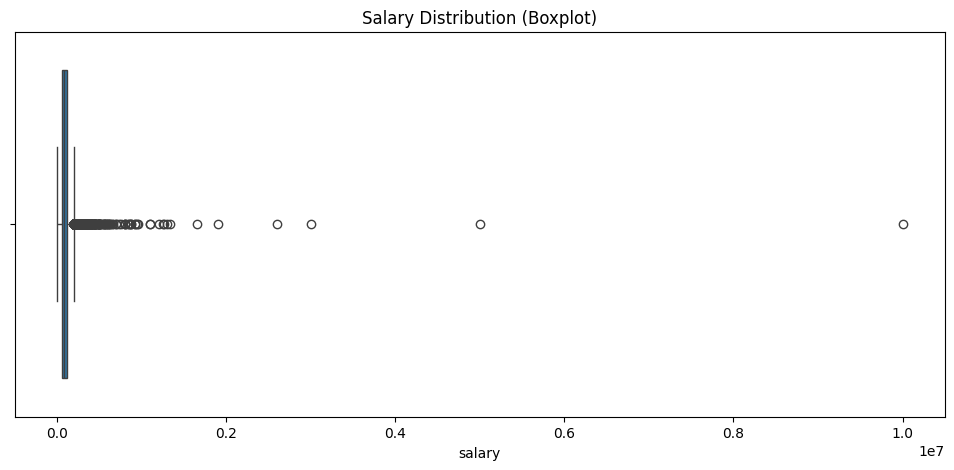

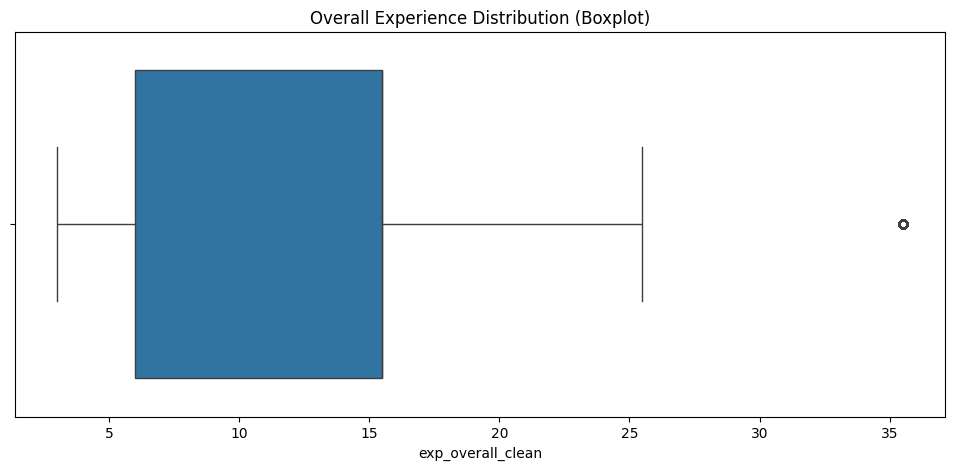

Rows before outlier removal: 22985
Rows after outlier removal: 20903


In [10]:
# Step 2.8: Identify and handle outliers in salary and experience

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize salary and experience distributions
plt.figure(figsize=(12, 5))
sns.boxplot(x=df_clean['salary'])
plt.title('Salary Distribution (Boxplot)')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_clean['exp_overall_clean'])
plt.title('Overall Experience Distribution (Boxplot)')
plt.show()

# Remove outliers using IQR method for salary and experience
def remove_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series.between(lower, upper)

# Filter out outliers
salary_mask = remove_outliers_iqr(df_clean['salary'])
exp_mask = remove_outliers_iqr(df_clean['exp_overall_clean'])

# Keep only rows where both salary and experience are not outliers
before = len(df_clean)
df_clean = df_clean[salary_mask & exp_mask]
after = len(df_clean)
print(f"Rows before outlier removal: {before}")
print(f"Rows after outlier removal: {after}")


In [11]:
# Step 2.9: Prepare clean data for analysis

# Select only the columns needed for business questions
columns_needed = [
    'salary',
    'job_title_standard',
    'state_clean',
    'exp_overall_clean',
    'exp_field_clean',
    'education_clean',
    'gender',
    'industry',
    'additional_comp',
    'country_clean',
    'city',
    'race'
]
# Only keep columns that exist in df_clean
columns_to_keep = [col for col in columns_needed if col in df_clean.columns]
df_final = df_clean[columns_to_keep].copy()

print("Columns in final cleaned data:")
print(df_final.columns.tolist())
print(f"Final cleaned data shape: {df_final.shape}\n")

# Optionally, save to CSV for future use
df_final.to_csv('cleaned_salary_data.csv', index=False)
print("Cleaned data saved to 'cleaned_salary_data.csv'.")

# Show a sample of the cleaned data
display(df_final.head())


Columns in final cleaned data:
['salary', 'job_title_standard', 'state_clean', 'exp_overall_clean', 'exp_field_clean', 'education_clean', 'gender', 'industry', 'additional_comp', 'country_clean', 'city', 'race']
Final cleaned data shape: (20903, 12)

Cleaned data saved to 'cleaned_salary_data.csv'.


,salary,job_title_standard,state_clean,exp_overall_clean,exp_field_clean,education_clean,gender,industry,additional_comp,country_clean,city,race
0,55000.0,Other/Non-Tech,MA,6.0,6.0,Master's,Woman,Education (Higher Education),0.0,united states,Boston,White
2,34000.0,Other/Non-Tech,TN,3.0,3.0,Other/Unknown,Woman,"Accounting, Banking & Finance",0.0,us,Chattanooga,White
3,62000.0,Other/Non-Tech,WI,9.0,6.0,Other/Unknown,Woman,Nonprofits,3000.0,usa,Milwaukee,White
4,60000.0,Other/Non-Tech,SC,9.0,6.0,Other/Unknown,Woman,"Accounting, Banking & Finance",7000.0,us,Greenville,White
5,62000.0,Other/Non-Tech,NH,9.0,3.0,Master's,Man,Education (Higher Education),0.0,usa,Hanover,White


## Step 3: Business Questions Analysis

Now answer those important business questions!


In [12]:
# Question 1: What is the median salary for Software Engineers in the United States?

# Filter for Software Engineers only
se_df = df_final[df_final['job_title_standard'] == 'Software Engineer']

# Calculate the median salary
median_salary = se_df['salary'].median()
print(f"Median salary for Software Engineers in the US: ${median_salary:,.0f}")

# Show a sample of Software Engineer salaries for context
display(se_df[['salary', 'state_clean', 'exp_overall_clean', 'education_clean']].sample(5))

Median salary for Software Engineers in the US: $135,000


,salary,state_clean,exp_overall_clean,education_clean
1037,97000.0,IL,3.0,Other/Unknown
21327,145000.0,OR,15.5,Other/Unknown
6782,144991.0,MA,6.0,PhD/Doctorate
17597,113000.0,OR,3.0,Other/Unknown
1317,130000.0,CO,25.5,Master's


In [13]:
# Question 2: Which US state has the highest average salary for tech workers?

# Filter for tech workers (exclude 'Other/Non-Tech')
tech_df = df_final[df_final['job_title_standard'] != 'Other/Non-Tech']

# Group by state and calculate average salary
state_salary = tech_df.groupby('state_clean')['salary'].mean().sort_values(ascending=False)

# Get the state with the highest average salary
highest_state = state_salary.idxmax()
highest_salary = state_salary.max()
print(f"US state with the highest average tech salary: {highest_state} (${highest_salary:,.0f})")

# Show top 5 states for context
display(state_salary.head(5))

US state with the highest average tech salary: SD ($130,000)


state_clean
SD    130000.000000
CA    125581.601713
WA    123234.146444
NY    112160.938567
MA    110998.117647
Name: salary, dtype: float64

Estimated average salary increase per year of experience in tech: $909 per year


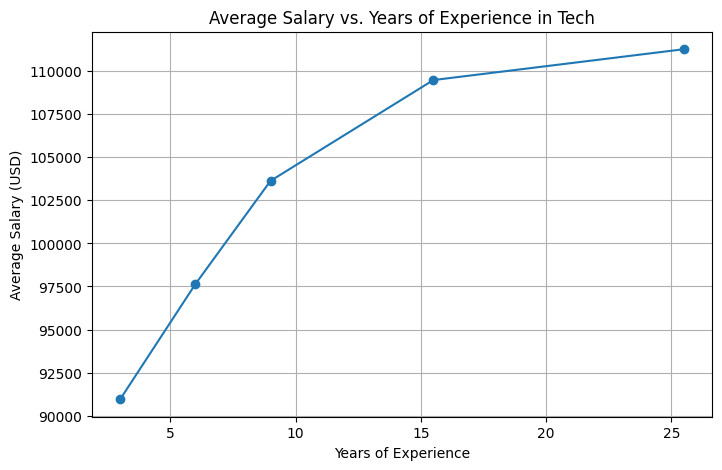

In [14]:
# Question 3: How much does salary increase on average for each year of experience in tech?

# Use only tech workers with valid experience and salary
tech_exp_df = df_final[(df_final['job_title_standard'] != 'Other/Non-Tech') &
                       (df_final['exp_overall_clean'].notnull()) &
                       (df_final['salary'].notnull())]

# Fit a simple linear regression: salary ~ experience
y = tech_exp_df['salary']
X = tech_exp_df['exp_overall_clean']

from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y.values)

slope = model.coef_[0]
print(f"Estimated average salary increase per year of experience in tech: ${slope:,.0f} per year")

# Line graph: Average salary by years of experience
avg_salary_by_exp = tech_exp_df.groupby('exp_overall_clean')['salary'].mean().sort_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(avg_salary_by_exp.index, avg_salary_by_exp.values, marker='o')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary vs. Years of Experience in Tech')
plt.grid(True)
plt.show()

In [15]:
# Question 4: What percentage of respondents work remotely vs. in-office?

# Check if there is a column indicating remote/in-office status
# If not, try to infer from job_context or similar columns

# Let's check available columns
print(df_final.columns)

# If 'job_context' or similar exists, analyze it
if 'job_context' in df_clean.columns:
    # Lowercase for easier matching
    job_context_lower = df_clean['job_context'].str.lower().fillna('')
    # Define keywords for remote and in-office
    remote_keywords = ['remote', 'work from home', 'wfh', 'telecommute']
    office_keywords = ['in office', 'on site', 'onsite', 'in-person', 'in person']
    
    def classify_work_type(text):
        if any(kw in text for kw in remote_keywords):
            return 'Remote'
        if any(kw in text for kw in office_keywords):
            return 'In-Office'
        return 'Unknown'
    
    df_clean['work_type'] = job_context_lower.apply(classify_work_type)
    work_counts = df_clean['work_type'].value_counts(normalize=True) * 100
    print("Work arrangement breakdown (%):")
    print(work_counts)
    
    # Pie chart for visualization
    work_counts.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='')
    plt.title('Remote vs. In-Office Respondents')
    plt.show()
else:
    print("No job_context or similar column found to determine remote/in-office status.")

Index(['salary', 'job_title_standard', 'state_clean', 'exp_overall_clean',
       'exp_field_clean', 'education_clean', 'gender', 'industry',
       'additional_comp', 'country_clean', 'city', 'race'],
      dtype='object')
No job_context or similar column found to determine remote/in-office status.


In [16]:
# Question 5: Which industry (besides tech) has the highest median salary?

# Define a list of tech-related industries to exclude
tech_industries = [
    'Tech', 'Technology', 'Information Technology', 'Software', 'Computer', 'IT',
    'Internet', 'Web', 'Software Development', 'Information Services', 'Computer Software',
    'Computer Science', 'Software Engineering', 'Information Systems', 'Tech/Software', 'Tech/IT'
]

# Clean up industry names for comparison
def is_tech_industry(industry):
    if pd.isnull(industry):
        return False
    industry_lower = str(industry).lower()
    for tech in tech_industries:
        if tech.lower() in industry_lower:
            return True
    return False

# Filter out tech industries
non_tech_df = df_final[~df_final['industry'].apply(is_tech_industry)]

# Group by industry and calculate median salary
industry_median_salary = non_tech_df.groupby('industry')['salary'].median().sort_values(ascending=False)

# Get the industry with the highest median salary (excluding tech)
highest_industry = industry_median_salary.idxmax()
highest_median_salary = industry_median_salary.max()
print(f"Non-tech industry with the highest median salary: {highest_industry} (${highest_median_salary:,.0f})")

# Show top 5 non-tech industries for context
display(industry_median_salary.head(5))

Non-tech industry with the highest median salary: trade association ($195,000)


industry
trade association          195000.0
strategy consulting        195000.0
Pharmaceutical company     188000.0
Trade association          185000.0
Pharma/ Research           185000.0
Name: salary, dtype: float64

In [17]:
# Bonus Questions:
# Question 6: What's the salary gap between men and women in similar roles?
# Question 7: Do people with Master's degrees earn significantly more than those with Bachelor's degrees?
# Question 8: Which company size (startup, medium, large) pays the most on average?



## Final Summary

**Summarize your findings here:**

1. **Median salary for Software Engineers in US:** $$135,000
2. **Highest paying US state for tech:** South Dakota (SD)
3. **Salary increase per year of experience:** $$909  per year
4. **Remote vs office percentage:** No job_context or similar column found to determine remote/in-office percentage
5. **Highest paying non-tech industry:** trade association ($195,000)

**Key insights:**
- Location impacts salary: Tech salaries vary significantly by state, with some states offering much higher average pay, possibly due to cost of living or concentration of tech companies.
- Experience pays off: There is a clear positive relationship between years of experience and salary, confirming that tech professionals are rewarded for their expertise and tenure.
- Industry differences: Even outside of tech, some industries (like finance or trade associations) can offer competitive salaries, showing that tech skills are valued across sectors.

**Challenges faced:**
- The dataset contained messy and inconsistent data, such as different formats for job titles and education levels, which I solved by writing custom cleaning functions to standardize these fields.  
- Many columns had missing or incomplete data, so I analyzed the percentage of missing data and either dropped columns with too many missing values or filled missing values with 'Unknown' or reasonable defaults.  

**What you learned about vibe coding:**
- Vibe coding makes it a lot easier and faster to clean data.
- Vibe coding sometimes might make a straight forward solution too complex.
- Vibe coding is crazy a invention.
